In [1]:
# import Padas libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress
import requests
import json



In [2]:
file1=("../sources/USA Covid Data.csv")
file2=("../sources/us_state_vac.csv")
file3=("../sources/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv")
covid_df=pd.read_csv(file1)
covid_df.head()

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Cases/1 mil population,Total Tests,Tests/1 mil population,Population
0,Alabama,1587224,20776,1515508,50940,323713,8795798,1793895,4903185
1,Alaska,288500,1397,285393,1710,394371,4648381,6354197,731545
2,Arizona,2384521,32311,2329469,22741,327602,21654295,2975015,7278717
3,Arkansas,989853,12729,970547,6577,328004,7874310,2609285,3017804
4,California,11846749,98873,11410470,337406,299825,193239047,4890614,39512223


In [3]:
covid_df.columns
#name of the columns for the first Dataset

Index(['State', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Total Cases/1 mil population', 'Total Tests',
       'Tests/1 mil population', 'Population'],
      dtype='object')

In [4]:
covid_df.info()
#information about each columns such as datatypes and if there is any null values for the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State                         46 non-null     object
 1   Total Cases                   46 non-null     int64 
 2   Total Deaths                  46 non-null     int64 
 3   Total Recovered               46 non-null     int64 
 4   Active Cases                  46 non-null     int64 
 5   Total Cases/1 mil population  46 non-null     int64 
 6   Total Tests                   46 non-null     int64 
 7   Tests/1 mil population        46 non-null     int64 
 8   Population                    46 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 3.4+ KB


In [5]:
covid_df=covid_df[["State","Total Cases","Total Deaths","Total Recovered","Active Cases","Total Tests","Population"]]
covid_df.head(10)

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,Alabama,1587224,20776,1515508,50940,8795798,4903185
1,Alaska,288500,1397,285393,1710,4648381,731545
2,Arizona,2384521,32311,2329469,22741,21654295,7278717
3,Arkansas,989853,12729,970547,6577,7874310,3017804
4,California,11846749,98873,11410470,337406,193239047,39512223
5,Colorado,1736198,14582,1685991,35625,20998161,5758736
6,Connecticut,956351,11858,919568,24925,16384702,3565287
7,Delaware,323151,3218,314916,5017,1026007,973764
8,Florida,7338503,83906,7194763,59834,65126036,21477737
9,Georgia,2984421,41417,2914300,28704,28006378,10617423


In [6]:
covid_df.describe()
#Checking the dataset parameters such as mean, std, count

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
count,4.600000e+01,46.000000,4.600000e+01,46.000000,4.600000e+01,4.600000e+01
mean,2.005924e+06,22033.478261,1.946178e+06,37712.195652,2.327141e+07,6.602005e+06
std,2.334750e+06,24140.167651,2.265344e+06,59720.515401,3.438429e+07,7.640298e+06
min,1.488350e+05,791.000000,1.462730e+05,713.000000,1.026007e+06,5.787590e+05
25%,5.722588e+05,5234.500000,5.567490e+05,6511.750000,5.919604e+06,1.827712e+06
50%,1.292898e+06,14852.500000,1.256976e+06,20242.000000,1.309189e+07,4.342705e+06
75%,2.202109e+06,24942.750000,2.138741e+06,37713.750000,2.348128e+07,7.530849e+06
max,1.184675e+07,98873.000000,1.141047e+07,337406.000000,1.932390e+08,3.951222e+07


In [7]:
covid_df["Percentage of cases"]=(covid_df["Total Cases"]/covid_df["Population"])*100
covid_df["Percentage of Death "]=(covid_df["Total Deaths"]/covid_df["Total Cases"])*100
covid_df["Percentage of Recovery"]=(covid_df["Total Recovered"]/(covid_df["Total Cases"])*100)
covid_df.head()

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population,Percentage of cases,Percentage of Death,Percentage of Recovery
0,Alabama,1587224,20776,1515508,50940,8795798,4903185,32.371285,1.308952,95.481671
1,Alaska,288500,1397,285393,1710,4648381,731545,39.437082,0.484229,98.923050
2,Arizona,2384521,32311,2329469,22741,21654295,7278717,32.760183,1.355031,97.691276
3,Arkansas,989853,12729,970547,6577,7874310,3017804,32.800440,1.285949,98.049609
4,California,11846749,98873,11410470,337406,193239047,39512223,29.982492,0.834600,96.317310


In [8]:
#maximum active covid cases for the  10 states

covid_max=covid_df.sort_values(by="Percentage of cases", ascending=False)

covid_max=covid_max.iloc[0:10,:]






<Axes: title={'center': 'Top 10 States with Covid 19 Active Cases Rate per population'}, xlabel='States', ylabel='Active Cases'>

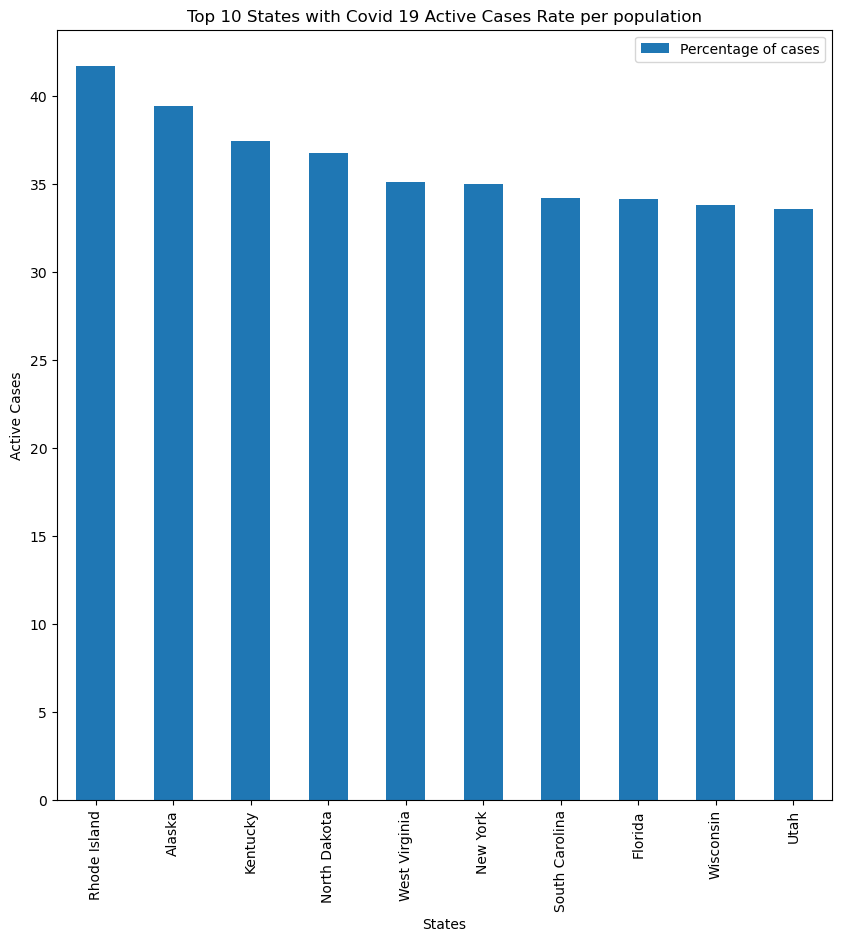

In [9]:
#Plot most active cases for 10 states
covid_max.plot(kind="bar", x="State", y="Percentage of cases",figsize=(10,10),xlabel="States", ylabel="Active Cases", title="Top 10 States with Covid 19 Active Cases Rate per population")

<Axes: title={'center': 'Least active cases per population'}, xlabel='States', ylabel='Active Cases%'>

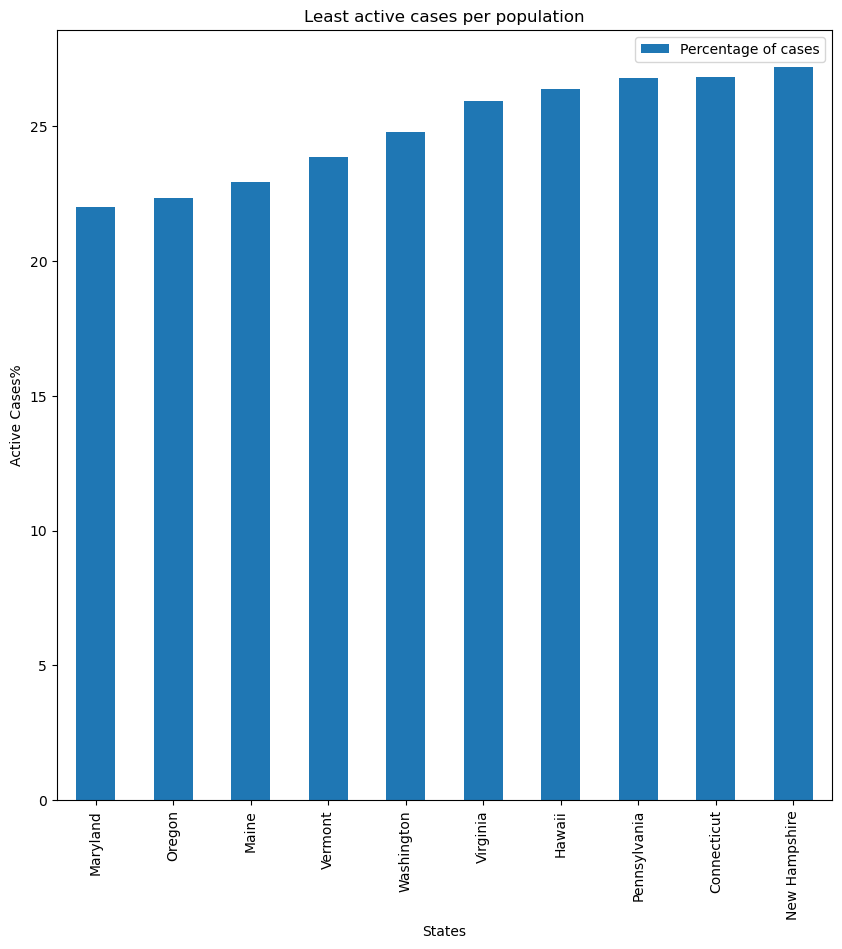

In [10]:
covid_min=covid_df.sort_values(by="Percentage of cases")

covid_min=covid_min.iloc[0:10,:]
covid_min.plot(kind="bar", x="State", y="Percentage of cases",figsize=(10,10),xlabel="States", ylabel="Active Cases%", title="Least active cases per population")

In [11]:

covid_max_deaths=covid_df.sort_values(by="Percentage of Death ", ascending=False)
covid_max_deaths
covid_max_deaths=covid_max_deaths.iloc[0:10,:]



<Axes: title={'center': ' Most 10 affected states with Death percentage per population'}, xlabel='States', ylabel='% of Deaths'>

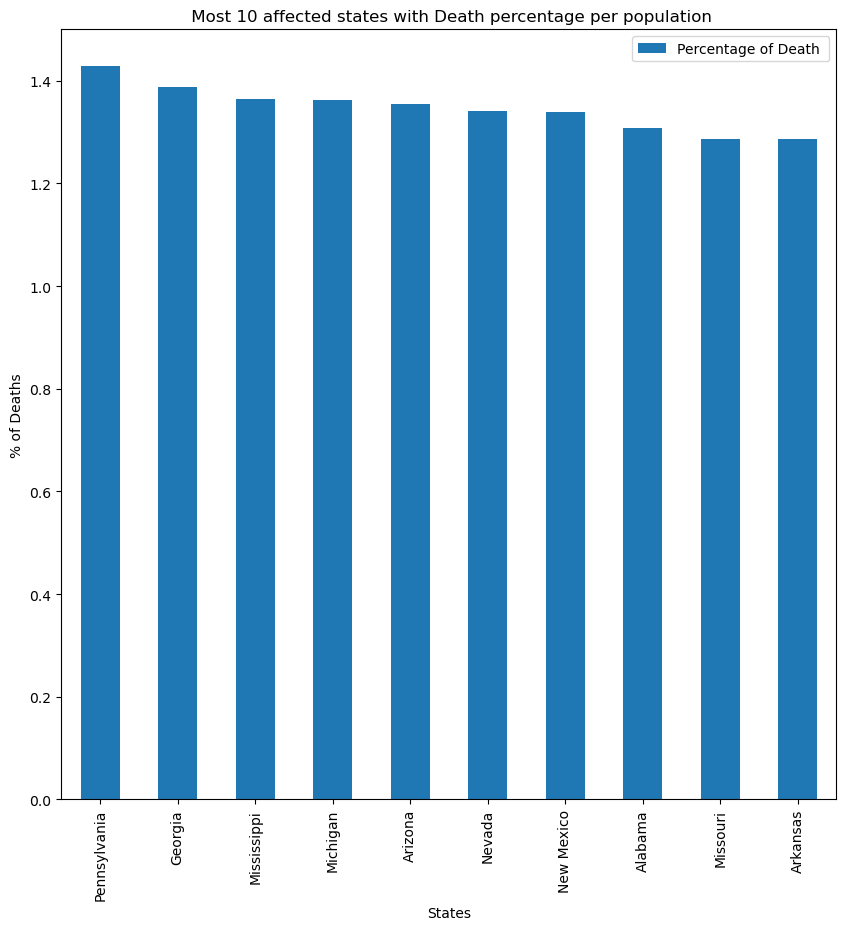

In [12]:
covid_max_deaths.plot(kind="bar",x="State",y="Percentage of Death ",figsize=(10,10),xlabel="States",ylabel="% of Deaths",title=" Most 10 affected states with Death percentage per population")

<Axes: title={'center': 'Lease affected States with Death per population'}, xlabel='States', ylabel='% of Deaths'>

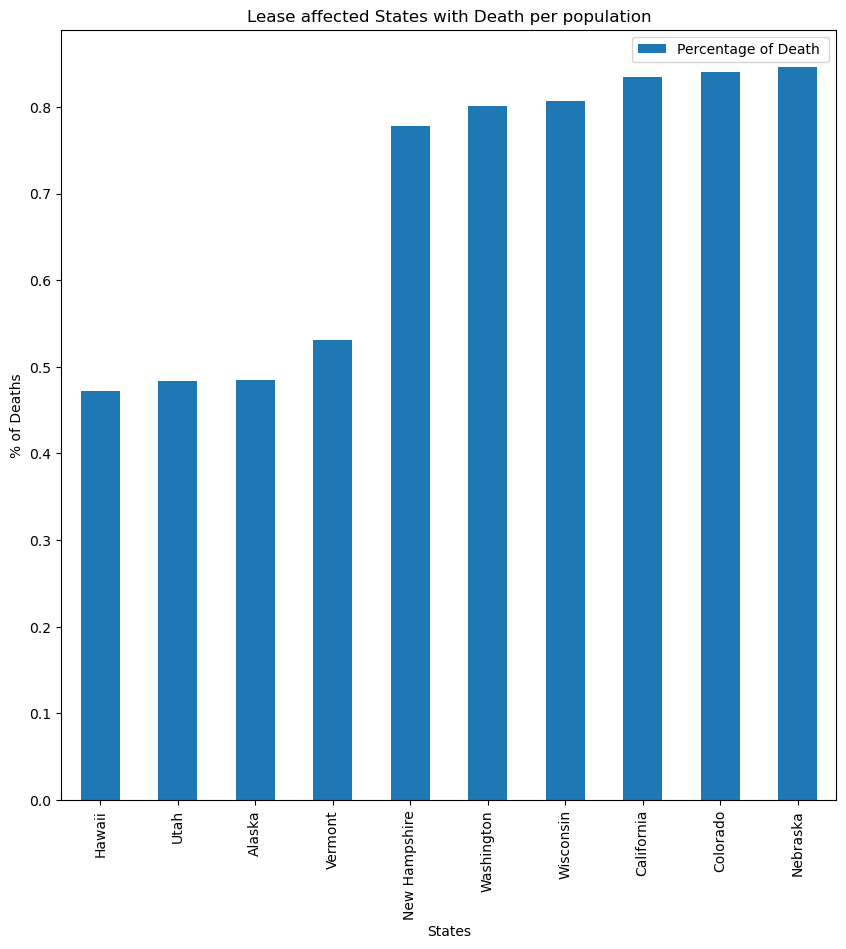

In [13]:
covid_min_deaths=covid_df.sort_values(by="Percentage of Death ")

covid_min_deaths=covid_min_deaths.iloc[0:10,:]
covid_min_deaths.plot(kind="bar",x="State",y="Percentage of Death ",figsize=(10,10),xlabel="States",ylabel="% of Deaths",title="Lease affected States with Death per population")

<Axes: title={'center': 'Top 15 states recovery rate'}, xlabel='States', ylabel='% Recovered'>

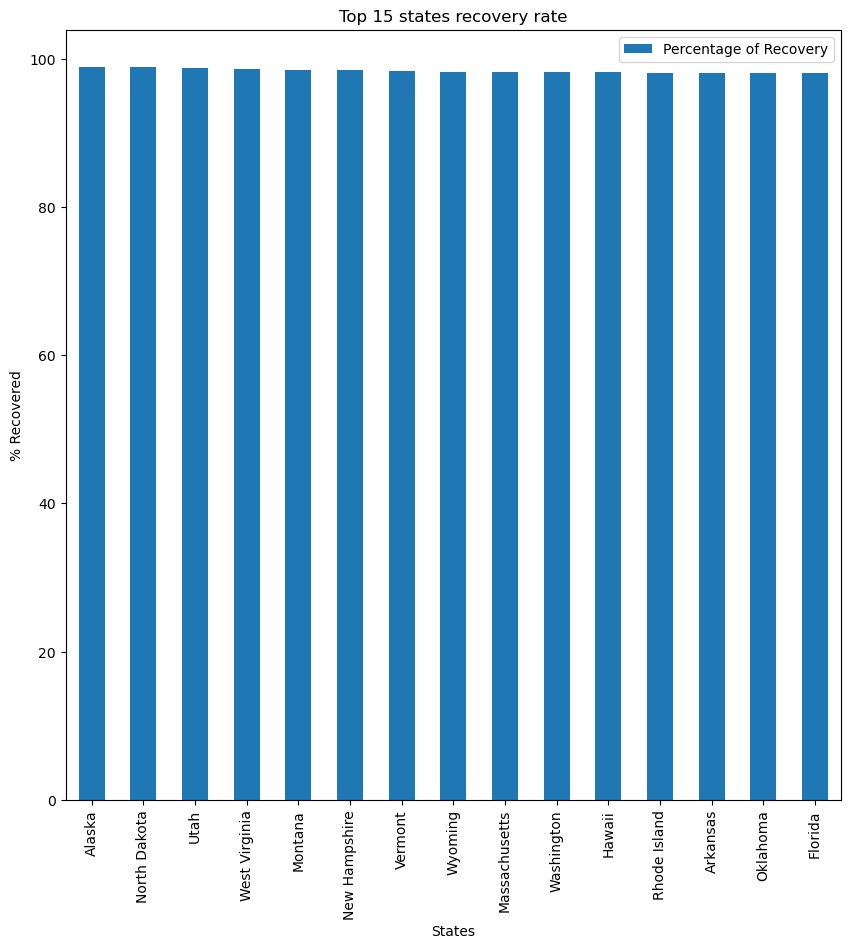

In [14]:
covid_max_recovery=covid_df.sort_values(by="Percentage of Recovery",ascending=False)
covid_max_recovery=covid_max_recovery.iloc[0:15,:]
covid_max_recovery.plot(kind="bar",x="State",y="Percentage of Recovery",figsize=(10,10),xlabel="States",ylabel="% Recovered",title="Top 15 states recovery rate")

In [15]:
vaccin_df=pd.read_csv(file2)
vaccin_df=vaccin_df.rename(columns={"location":"State"})
vaccin_df.head(20)


,date,State,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN
5,2021-01-17,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7509.0,1531.0,NaN,NaN,NaN
6,2021-01-18,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7517.0,1533.0,NaN,NaN,NaN
7,2021-01-19,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,9.07,NaN,7523.0,1534.0,0.294,NaN,NaN
8,2021-01-20,Alabama,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288,NaN,NaN
9,2021-01-21,Alabama,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336,NaN,NaN


In [16]:
vaccin_df.columns


Index(['date', 'State', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used', 'total_boosters',
       'total_boosters_per_hundred'],
      dtype='object')

In [17]:
vaccin_df=vaccin_df.iloc[:,[1,5,6]]

vaccin_df.head(20)

,State,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred
0,Alabama,0.15,1.59
1,Alabama,0.19,1.71
2,Alabama,NaN,1.88
3,Alabama,0.28,2.05
4,Alabama,NaN,NaN
5,Alabama,NaN,NaN
6,Alabama,NaN,NaN
7,Alabama,0.33,2.67
8,Alabama,0.37,2.84
9,Alabama,0.44,3.38


In [18]:
vaccin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41601 entries, 0 to 41600
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   State                                41601 non-null  object 
 1   people_fully_vaccinated_per_hundred  24652 non-null  float64
 2   total_vaccinations_per_hundred       24710 non-null  float64
dtypes: float64(2), object(1)
memory usage: 975.1+ KB


In [19]:
total_vaccination=vaccin_df.iloc[:,[0,2]]
total_vaccination["Total_Vaccination"]=total_vaccination["total_vaccinations_per_hundred"]*100
total_vaccination_df=total_vaccination.iloc[:,[0,2]]
total_vaccination_df

,State,Total_Vaccination
0,Alabama,159.0
1,Alabama,171.0
2,Alabama,188.0
3,Alabama,205.0
4,Alabama,NaN
...,...,...
41596,Wyoming,NaN
41597,Wyoming,NaN
41598,Wyoming,NaN
41599,Wyoming,NaN


In [20]:
fully_vaccination_only=vaccin_df.iloc[:,[0,1]]

fully_vaccination_only["Fully_Vaccinated"]=fully_vaccination_only["people_fully_vaccinated_per_hundred"]*100

fully_vaccination_df=fully_vaccination_only.iloc[:,[0,2]]
fully_vaccination_df

,State,Fully_Vaccinated
0,Alabama,15.0
1,Alabama,19.0
2,Alabama,NaN
3,Alabama,28.0
4,Alabama,NaN
...,...,...
41596,Wyoming,NaN
41597,Wyoming,NaN
41598,Wyoming,NaN
41599,Wyoming,NaN


In [21]:
total_vaccination_group=total_vaccination_df.groupby(by="State").sum()
total_vaccination_group

,Total_Vaccination
State,
Alabama,4698768.0
Alaska,5418730.0
Arizona,6032609.0
Arkansas,5200505.0
California,4891125.0
Colorado,6867373.0
Connecticut,7814920.0
Delaware,6695251.0
Florida,6408946.0


In [22]:
fully_vaccination_group=fully_vaccination_df.groupby(by="State").sum()
fully_vaccination_group

,Fully_Vaccinated
State,
Alabama,1967218.0
Alaska,2273713.0
Arizona,2385741.0
Arkansas,2115165.0
California,1997216.0
Colorado,2794066.0
Connecticut,3181344.0
Delaware,2671002.0
Florida,2610865.0


In [23]:
Vaccination_df=pd.concat([total_vaccination_group,fully_vaccination_group],axis=1)
Vaccination_df.head()


,Total_Vaccination,Fully_Vaccinated
State,,
Alabama,4698768.0,1967218.0
Alaska,5418730.0,2273713.0
Arizona,6032609.0,2385741.0
Arkansas,5200505.0,2115165.0
California,4891125.0,1997216.0


In [24]:
Vaccination_df["Percentage of People Vaccinated of Total_vaccin"]=(Vaccination_df["Fully_Vaccinated"]/Vaccination_df["Total_Vaccination"])*100
Vaccination_df

,Total_Vaccination,Fully_Vaccinated,Percentage of People Vaccinated of Total_vaccin
State,,,
Alabama,4698768.0,1967218.0,41.866677
Alaska,5418730.0,2273713.0,41.960256
Arizona,6032609.0,2385741.0,39.547416
Arkansas,5200505.0,2115165.0,40.672300
California,4891125.0,1997216.0,40.833469
Colorado,6867373.0,2794066.0,40.686096
Connecticut,7814920.0,3181344.0,40.708593
Delaware,6695251.0,2671002.0,39.893979
Florida,6408946.0,2610865.0,40.737822


In [25]:
Sorted_Vaccin_df=Vaccination_df.sort_values(by="Fully_Vaccinated",ascending=False)

In [26]:
Sorted_Vaccin_df.head(10)

,Total_Vaccination,Fully_Vaccinated,Percentage of People Vaccinated of Total_vaccin
State,,,
Rhode Island,7641411.0,3222396.0,42.170170
Connecticut,7814920.0,3181344.0,40.708593
Massachusetts,7762061.0,3110272.0,40.070182
Maine,7226684.0,3017487.0,41.754794
New York State,7276279.0,3003381.0,41.276331
New Jersey,6870598.0,2898632.0,42.188933
Maryland,7037212.0,2896953.0,41.166203
Virginia,6868041.0,2799160.0,40.756309
Colorado,6867373.0,2794066.0,40.686096


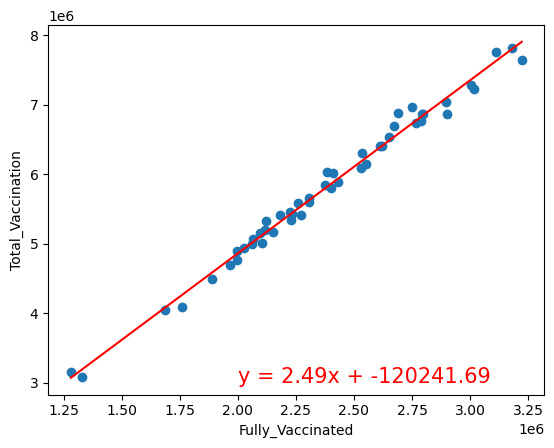

Total vaccin needed for 5000000 is 12329139.83826615
the r value is 0.9945935233351826


In [27]:

x_values = Sorted_Vaccin_df["Fully_Vaccinated"]
y_values = Sorted_Vaccin_df["Total_Vaccination"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000000,3000000),fontsize=15,color="red")
plt.xlabel("Fully_Vaccinated")
plt.ylabel("Total_Vaccination")
plt.show()
x=5000000
regress_values_1=5000000*slope+intercept
print(f"Total vaccin needed for 5000000 is {regress_values_1}")
print(f"the r value is {rvalue}")

In [28]:
main_df=pd.read_csv(file3)
main_df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1554.0,1630.0,NaN
1,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5775.0,5998.0,NaN
2,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15026.0,15643.0,NaN
3,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37335.0,38794.0,NaN
4,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82382.0,85404.0,NaN


In [29]:
main_df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,571320.000000,521640.000000,4.111710e+05,4.167610e+05
mean,2021.304348,6.071429,1.266096e+02,1.362334e+02
std,1.039850,3.425349,3.052289e+03,3.279466e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.900000e+01,2.100000e+01
max,2023.000000,12.000000,1.135624e+06,1.135624e+06


In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583740 entries, 0 to 583739
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          583740 non-null  object 
 1   Start Date          583740 non-null  object 
 2   End Date            583740 non-null  object 
 3   Group               583740 non-null  object 
 4   Year                571320 non-null  float64
 5   Month               521640 non-null  float64
 6   State               583740 non-null  object 
 7   Condition Group     583740 non-null  object 
 8   Condition           583740 non-null  object 
 9   ICD10_codes         583740 non-null  object 
 10  Age Group           583740 non-null  object 
 11  COVID-19 Deaths     411171 non-null  float64
 12  Number of Mentions  416761 non-null  float64
 13  Flag                172569 non-null  object 
dtypes: float64(4), object(10)
memory usage: 62.4+ MB


In [31]:
clean_df=main_df.loc[main_df["COVID-19 Deaths"]>0]
clean_df=main_df.loc[(main_df["State"] != "United States") & (main_df["State"]!= "District of Columbia") & (main_df["State"]!= "Puerto Rico")]



In [32]:
clean_df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
230,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,20.0,20.0,NaN
231,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,103.0,108.0,NaN
232,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,230.0,237.0,NaN
233,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,547.0,564.0,NaN
234,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,1188.0,1224.0,NaN


In [33]:
clean_df.count()

Data As Of            551310
Start Date            551310
End Date              551310
Group                 551310
Year                  539580
Month                 492660
State                 551310
Condition Group       551310
Condition             551310
ICD10_codes           551310
Age Group             551310
COVID-19 Deaths       385359
Number of Mentions    390811
Flag                  165951
dtype: int64

In [34]:
clean_df=clean_df.drop(columns=["Group","Year","Month","Flag","ICD10_codes"])
clean_df=clean_df.loc[clean_df["Age Group"]!="All Ages"]
clean_df.head()

,Data As Of,Start Date,End Date,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
230,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,20.0,20.0
231,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,103.0,108.0
232,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,230.0,237.0
233,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,547.0,564.0
234,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1188.0,1224.0


In [35]:
clean_df["State"].unique

<bound method Series.unique of 230       Alabama
231       Alabama
232       Alabama
233       Alabama
234       Alabama
           ...   
574033    Wyoming
574034    Wyoming
574035    Wyoming
574036    Wyoming
574037    Wyoming
Name: State, Length: 496179, dtype: object>

In [36]:
clean_df=clean_df.rename(columns={"Data As Of":"Reported Date"})
clean_df_1=clean_df.loc[clean_df["Condition"]!="COVID-19"]
clean_df_2=clean_df_1.loc[clean_df_1["Condition"]!="All other conditions and causes (residual) "]

In [37]:
clean_df_1.head()

,Reported Date,Start Date,End Date,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
230,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,20.0,20.0
231,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,103.0,108.0
232,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,230.0,237.0
233,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,547.0,564.0
234,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1188.0,1224.0


In [38]:
analytic_data=clean_df_2.iloc[:,0:8]
analytic_data.head(20)

,Reported Date,Start Date,End Date,State,Condition Group,Condition,Age Group,COVID-19 Deaths
230,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,20.0
231,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,103.0
232,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,230.0
233,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,547.0
234,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1188.0
235,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,65-74,1812.0
236,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,75-84,1855.0
237,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,85+,1209.0
238,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,Not stated,0.0
240,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Chronic lower respiratory diseases,0-24,0.0


In [39]:
age_group=analytic_data.groupby(by="Age Group").sum()
age_group

C:\Users\tedta\AppData\Local\Temp\ipykernel_17692\3205650187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_group=analytic_data.groupby(by="Age Group").sum()


,COVID-19 Deaths
Age Group,
0-24,13955.0
25-34,65499.0
35-44,197143.0
45-54,536910.0
55-64,1304411.0
65-74,2180075.0
75-84,2512579.0
85+,2407782.0
Not stated,0.0


In [40]:
age_group.describe()

,COVID-19 Deaths
count,9.000000e+00
mean,1.024262e+06
std,1.087100e+06
min,0.000000e+00
25%,6.549900e+04
50%,5.369100e+05
75%,2.180075e+06
max,2.512579e+06


In [41]:
age_group=age_group.drop("Not stated")

In [42]:
age_group

,COVID-19 Deaths
Age Group,
0-24,13955.0
25-34,65499.0
35-44,197143.0
45-54,536910.0
55-64,1304411.0
65-74,2180075.0
75-84,2512579.0
85+,2407782.0


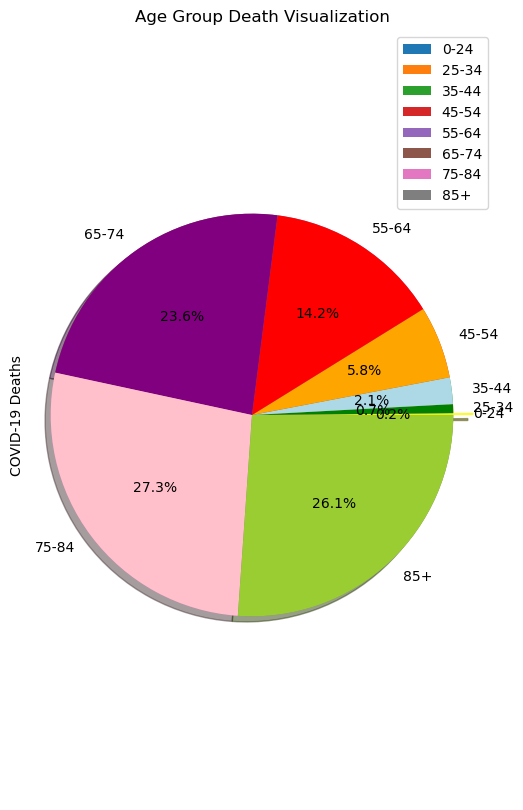

<Figure size 640x480 with 0 Axes>

In [43]:
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen"]
explode = (0.1,0,0,0,0,0,0,0)

age_group.plot(kind="pie",y="COVID-19 Deaths",title="Age Group Death Visualization",figsize=(6,10))
plt.pie(x=age_group["COVID-19 Deaths"],autopct="%1.1f%%",shadow=True,explode=explode,colors=colors,startangle=0)
plt.axis("equal")
plt.title("Age Group Death Visualization")
plt.ylabel("COVID-19 Deaths")

plt.show()
plt.savefig("../sources/Agegroup.png")
plt.show()

In [44]:
clean_df_2.head(10)

,Reported Date,Start Date,End Date,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
230,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,20.0,20.0
231,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,103.0,108.0
232,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,230.0,237.0
233,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,547.0,564.0
234,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1188.0,1224.0
235,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,65-74,1812.0,1844.0
236,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,75-84,1855.0,1893.0
237,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,85+,1209.0,1221.0
238,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,Not stated,0.0,0.0
240,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Chronic lower respiratory diseases,0-24,0.0,0.0


In [45]:
clean_df_2["Condition Group"].unique

<bound method Series.unique of 230                             Respiratory diseases
231                             Respiratory diseases
232                             Respiratory diseases
233                             Respiratory diseases
234                             Respiratory diseases
                             ...                    
573613    All other conditions and causes (residual)
573614    All other conditions and causes (residual)
573615    All other conditions and causes (residual)
573616    All other conditions and causes (residual)
573617    All other conditions and causes (residual)
Name: Condition Group, Length: 474606, dtype: object>

In [46]:
condition_group=analytic_data.groupby(by="Condition").sum()

condition_group=condition_group.drop(index="All other conditions and causes (residual)")
condition_group.head(20)

C:\Users\tedta\AppData\Local\Temp\ipykernel_17692\3938809528.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  condition_group=analytic_data.groupby(by="Condition").sum()


,COVID-19 Deaths
Condition,
Adult respiratory distress syndrome,294358.0
Alzheimer disease,92608.0
Cardiac arrest,379575.0
Cardiac arrhythmia,255599.0
Cerebrovascular diseases,159908.0
Chronic lower respiratory diseases,300747.0
Diabetes,475999.0
Heart failure,266954.0
Hypertensive diseases,608649.0


<Axes: title={'center': 'Most Risk Diseases underlying Covid-19 Deaths'}, xlabel='Diseases', ylabel='COVID-19 Deaths'>

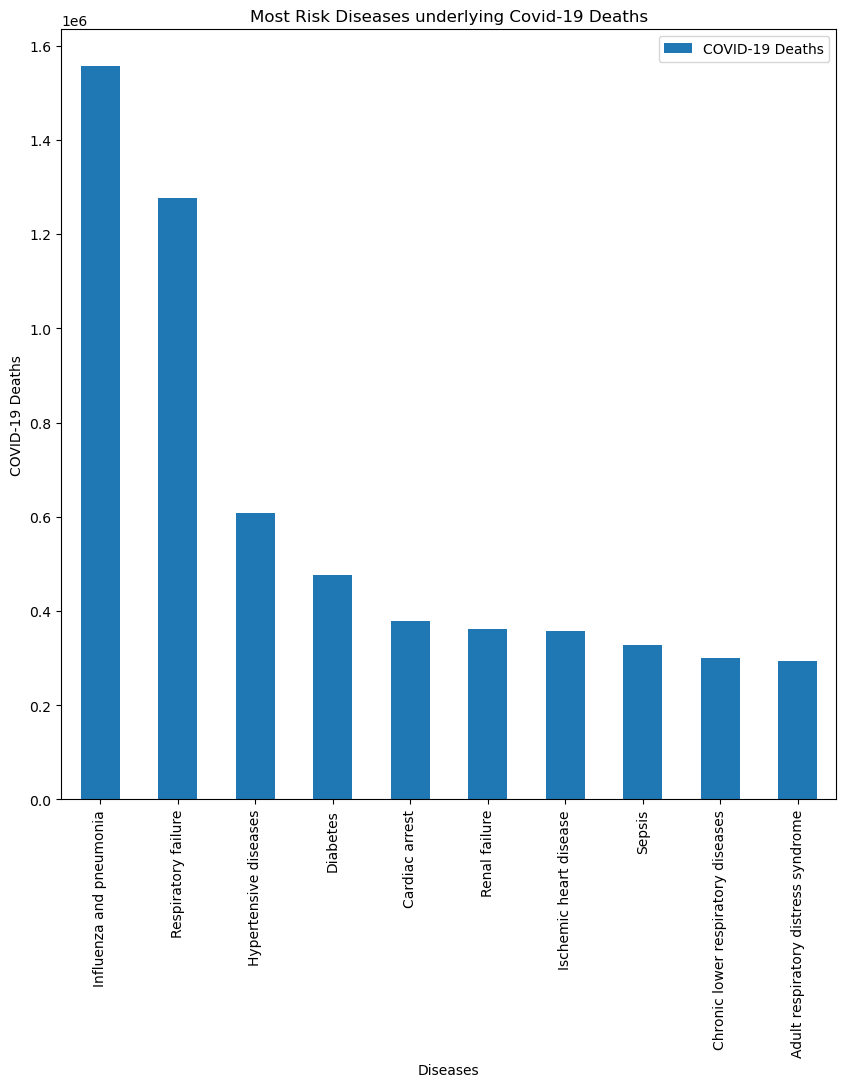

In [47]:
condition_max=condition_group.sort_values(by="COVID-19 Deaths", ascending=False)
condition_max=condition_max.iloc[0:10,:]
condition_max.plot(kind="bar", y="COVID-19 Deaths",figsize=(10,10),xlabel="Diseases", ylabel="COVID-19 Deaths", title="Most Risk Diseases underlying Covid-19 Deaths")


<Axes: title={'center': 'Least Risk Diseases underlying Covid-19 Deaths'}, xlabel='Diseases', ylabel='COVID-19 Deaths'>

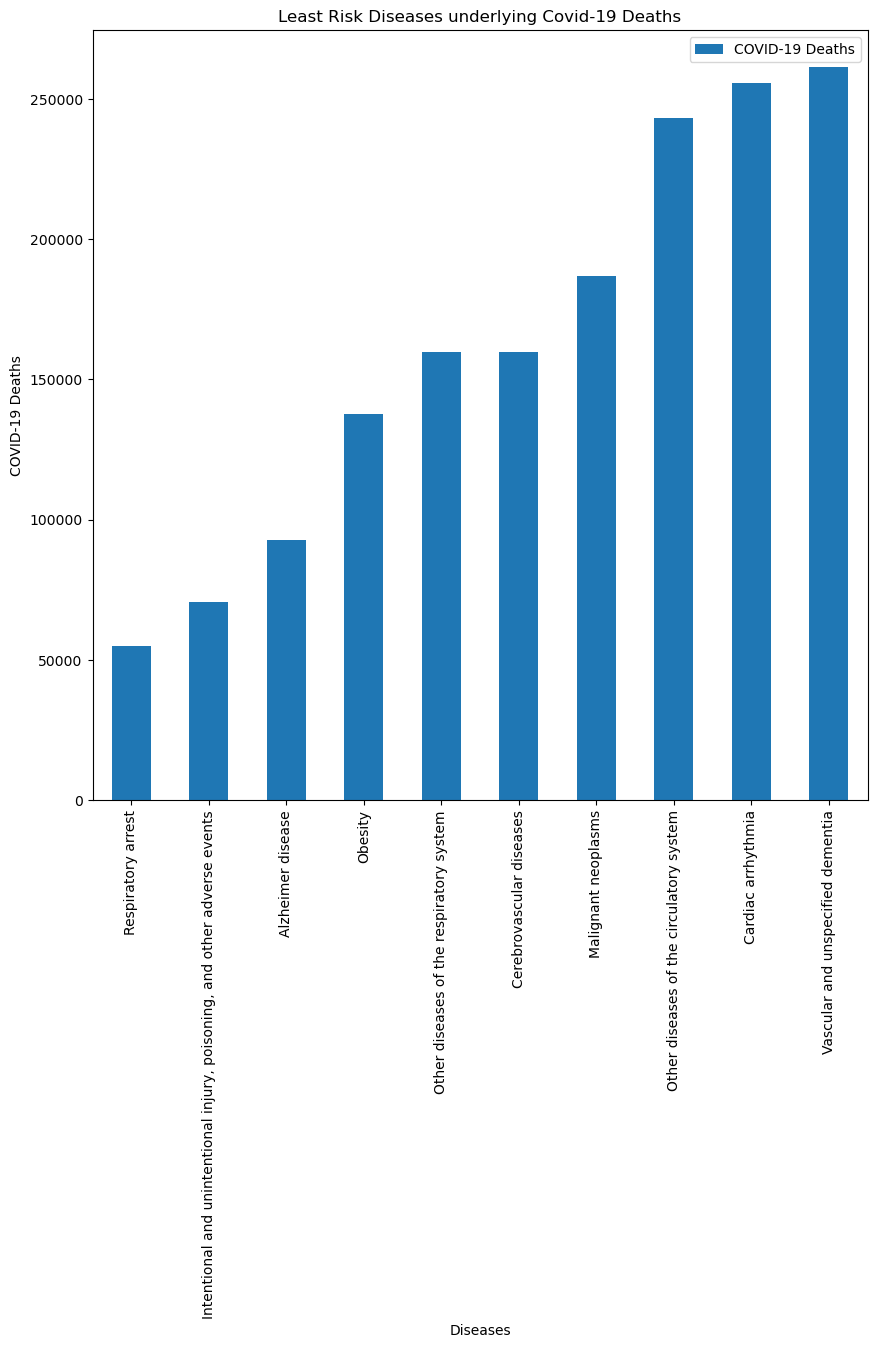

In [48]:
condition_min=condition_group.sort_values(by="COVID-19 Deaths")
condition_min=condition_min.iloc[0:10,:]
condition_min.plot(kind="bar", y="COVID-19 Deaths",figsize=(10,10),xlabel="Diseases", ylabel="COVID-19 Deaths", title="Least Risk Diseases underlying Covid-19 Deaths")

In [49]:
analytic_data.head()


,Reported Date,Start Date,End Date,State,Condition Group,Condition,Age Group,COVID-19 Deaths
230,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,20.0
231,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,103.0
232,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,230.0
233,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,547.0
234,06/25/2023,01/01/2020,06/24/2023,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1188.0


Which State you want to check the most covid death reasonalabama
Do you want to check more state?if yes press any button, if no please write nono
Condition Group
All other conditions and causes (residual)                                   21910.0
Alzheimer disease                                                             1130.0
Circulatory diseases                                                         34953.0
Diabetes                                                                      6018.0
Intentional and unintentional injury, poisoning, and other adverse events      649.0
Malignant neoplasms                                                           2369.0
Obesity                                                                       1425.0
Renal failure                                                                 6672.0
Respiratory diseases                                                         60233.0
Sepsis                                                                   

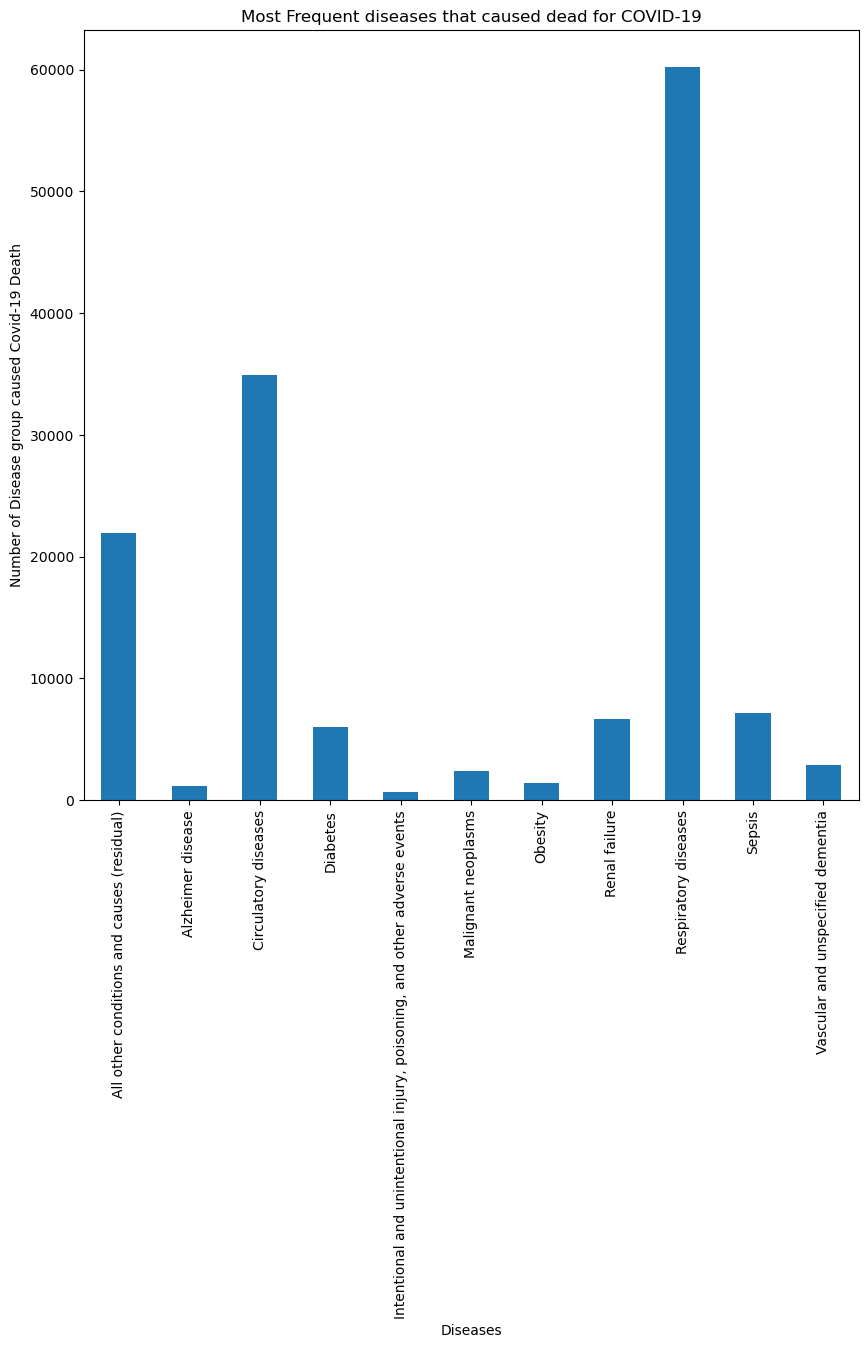

In [59]:
loop_on=True

while loop_on:
    state=input("Which State you want to check the most covid death reason").capitalize()
    user_input=input("Do you want to check more state?if yes press any button, if no please write no").lower()
    df1=analytic_data.loc[analytic_data["State"]==state]
    df2=df1.groupby("Condition Group")["COVID-19 Deaths"].sum()
    print(df2)
    
    if user_input=="no":
        loop_on=False
        
        df2.plot(kind="bar", y="COVID-19 Deaths",figsize=(10,10),xlabel="Diseases", ylabel="Number of Disease group caused Covid-19 Death", title="Most Frequent diseases that caused dead for COVID-19")
        plt.show()
    else:

    
        df2.plot(kind="bar", y="COVID-19 Deaths",figsize=(10,10),xlabel="Diseases", ylabel="Number of Disease group caused Covid-19 Death", title="Most Frequent diseases that caused dead for COVID-19")
        plt.show()
    
    
    